# QA: Plot behavioral model comparisons
Natalia Vélez, February 2023

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_context('talk')
sns.set_style('white')

## Load data

Teacher data

In [2]:
teacher_df = pd.read_csv('../2_behavioral/outputs/teaching_behavior.csv')
teacher_df['count'] = 1-pd.isna(teacher_df['example'])*1
teacher_df['num_hint'] = teacher_df.groupby(['subject', 'run', 'problem'])['count'].agg('cumsum')
teacher_df = teacher_df.dropna(subset=['example', 'rating'])
teacher_df.head()

,subject,run,block_idx,ex_idx,first_movement,start,onset,problem,order,example,rating,count,num_hint
0,1,1,0,0,"[0, 1]","[0, 0]",30.00,22,"['C', 'B', 'D', 'A']","[1, 2]",1.0,1,1
1,1,1,0,1,"[0, 1]","[0, 0]",45.35,22,"['C', 'B', 'D', 'A']","[4, 3]",2.0,1,2
3,1,1,1,0,"[0, 4]","[0, 5]",104.05,18,"['D', 'B', 'C', 'A']","[0, 3]",0.0,1,1
5,1,1,1,2,"[0, 4]","[0, 5]",132.55,18,"['D', 'B', 'C', 'A']","[1, 1]",3.0,1,3
6,1,1,2,0,"[5, 4]","[5, 5]",175.90,1,"['A', 'D', 'C', 'B']","[5, 1]",1.0,1,1


Student data

In [3]:
student_df = pd.read_csv('outputs/student_beliefs.csv').sort_values(by=['worker', 'num_trial'])
student_df.head()

,time_elapsed,teacher,problem,num_trial,num_hint,bets,bonus,worker,trial_order,order,bets_sorted,belief_in_true,teacher_rating
9789,403458,16,14,0,1,"[48, 0, 0, 54]",0.019608,0,118,"['A', 'B', 'C', 'D']","[48, 0, 0, 54]",0.470588,3
9794,456628,16,14,0,2,"[50, 0, 0, 54]",0.020032,0,118,"['A', 'B', 'C', 'D']","[50, 0, 0, 54]",0.480769,4
9799,486037,16,14,0,3,"[50, 0, 0, 54]",0.020032,0,118,"['A', 'B', 'C', 'D']","[50, 0, 0, 54]",0.480769,4
6015,526473,30,23,1,1,"[0, 0, 51, 51]",0.020833,0,118,"['C', 'B', 'D', 'A']","[51, 0, 0, 51]",0.500000,3
6020,548172,30,23,1,2,"[0, 0, 0, 100]",0.041667,0,118,"['C', 'B', 'D', 'A']","[100, 0, 0, 0]",1.000000,5


Model predictions

In [4]:
model_df = pd.read_csv('../2_behavioral/outputs/model_regressor_values.csv')
model_df['count'] = 1
model_df['num_hint'] = model_df.groupby(['subject', 'run', 'problem'])['count'].agg('cumsum')
model_df.head()

,subject,run,block_idx,ex_idx,problem,pH,pTrue,KL,logp,pTrue_unscaled,KL_unscaled,count,num_hint
0,1,1,0,0,22,"[0.3333333333333333, 0.3333333333333333, 0.0, ...",-0.126543,0.516503,-inf,0.333333,1.740425,1,1
1,1,1,0,1,22,"[0.5, 0.0, 0.0, 0.5]",0.040123,1.209600,-inf,0.500000,2.433523,1,2
2,1,1,1,0,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,2.341827,-inf,0.500000,3.565749,1,1
3,1,1,1,1,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,-1.223922,-inf,0.500000,0.000000,1,2
4,1,1,1,2,18,"[0.5, 0.5, 0.0, 0.0]",0.040123,-1.223922,-inf,0.500000,0.000000,1,3


Regression model comparisons:

In [5]:
teacher_vs_time = pd.read_csv('outputs/teacher_vs_time.csv')
teacher_vs_time['term'] = (
    teacher_vs_time['term'].astype('category')
    .cat.reorder_categories(['time_teacher', 'belief_teacher', 'full_teacher'])
    .cat.rename_categories({'time_teacher': 'Time', 'belief_teacher': 'Beliefs', 'full_teacher': 'Time +\nBeliefs'})
)

teacher_vs_time.head()

,term,npar,AIC,BIC,logLik,deviance,statistic,df,p.value
0,Time,5,6834.785721,6865.029662,-3412.392861,6824.785721,NaN,NaN,NaN
1,Beliefs,5,7695.150013,7725.393954,-3842.575006,7685.150013,0.000000,0.0,NaN
2,Time +\nBeliefs,6,6497.178848,6533.471578,-3242.589424,6485.178848,1199.971165,1.0,6.188221e-263


In [6]:
student_vs_time = pd.read_csv('outputs/student_vs_time.csv')
student_vs_time['term'] = (
    student_vs_time['term'].astype('category')
    .cat.reorder_categories(['time_student', 'belief_student', 'full_student'])
    .cat.rename_categories({'time_student': 'Time', 'belief_student': 'Beliefs', 'full_student': 'Time +\nBeliefs'})
)

student_vs_time.head()

,term,npar,AIC,BIC,logLik,deviance,statistic,df,p.value
0,Time,5,-4115.004772,-4076.689419,2062.502386,-4125.004772,NaN,NaN,NaN
1,Beliefs,5,-8681.911434,-8643.596080,4345.955717,-8691.911434,4566.906662,0.0,NaN
2,Time +\nBeliefs,6,-9179.422798,-9133.444374,4595.711399,-9191.422798,499.511364,1.0,1.214193e-110


## Check 1: Correlations between belief regressors & time

Model-based belief regressors:

SpearmanrResult(correlation=0.28921552442773735, pvalue=6.008713919189973e-63)


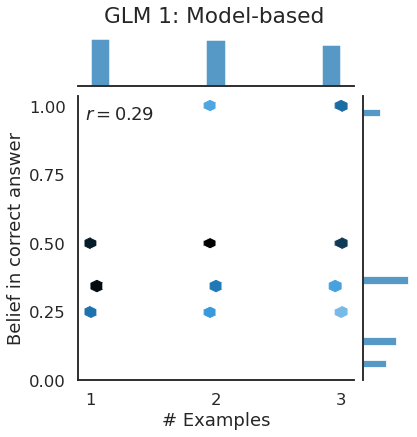

In [7]:
model_time_corr = model_df[['num_hint', 'pTrue_unscaled']].corr('spearman')
print(stats.spearmanr(model_df['num_hint'], model_df['pTrue_unscaled']))
mt_r = model_time_corr.loc['num_hint', 'pTrue_unscaled']

g = sns.jointplot(data=model_df, x='num_hint', y='pTrue_unscaled', kind='hex')
g.ax_joint.set(xlabel = '# Examples', ylabel = r'Belief in correct answer', xticks=[1,2,3], yticks=[0,.25,.5,.75,1])
g.ax_joint.text(0.95,0.95, r"$r = %.2f$" % (mt_r))
g.fig.suptitle('GLM 1: Model-based', y = 1.025)

plt.savefig('plots/model_vs_time_corr.pdf', bbox_inches='tight')

Empirical belief regressors:

SpearmanrResult(correlation=0.30807122381841634, pvalue=0.0)


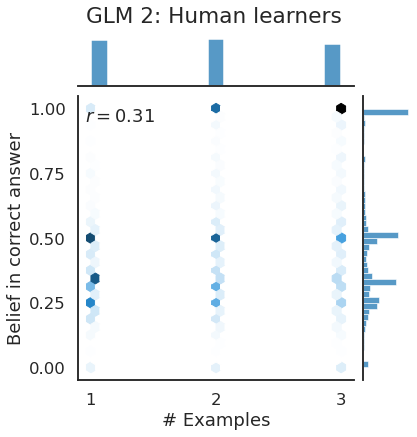

In [8]:
empirical_time_corr = student_df[['num_hint', 'belief_in_true']].corr('spearman')
print(stats.spearmanr(student_df['num_hint'], student_df['belief_in_true']))
et_r = empirical_time_corr.loc['num_hint', 'belief_in_true']

g = sns.jointplot(data=student_df, x='num_hint', y='belief_in_true', kind='hex')
g.ax_joint.set(xlabel = '# Examples', ylabel = r'Belief in correct answer', xticks=[1,2,3], yticks=[0,.25,.5,.75,1])
g.ax_joint.text(0.95,0.95, r"$r = %.2f$" % (et_r))
g.fig.suptitle('GLM 2: Human learners', y=1.025)

plt.savefig('plots/empirical_vs_time_corr.pdf', bbox_inches='tight')

## Check 2: Teacher ratings

Plot change in ratings over time:

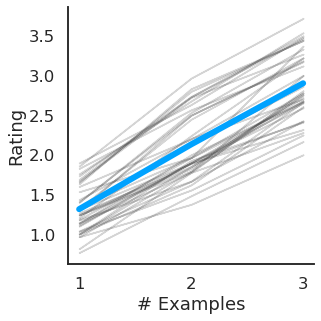

In [9]:
problem_pal = ['#333']*teacher_df.problem.nunique()
g = sns.relplot(data=teacher_df, x='num_hint', y='rating', hue='problem', kind='line', height=4.5, aspect=1,legend=False, palette=problem_pal, alpha=.01, ci=False)
g.set(xlabel='# Examples', ylabel='Rating')
sns.lineplot(data=teacher_df, x='num_hint', y='rating', ax=g.axes[0,0], ci=False, linewidth=6, color='#00A2FF')

plt.savefig('plots/teacher_ratings_over_time.pdf', bbox_inches='tight')

Plot model comparison:

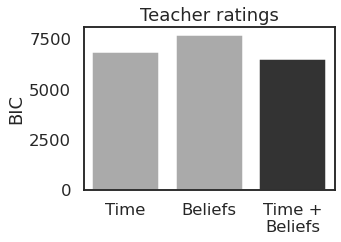

In [10]:
# color palette for exposition
pal = ['#aaa', '#aaa', '#333']

# draw plot
fig,ax = plt.subplots(figsize=(4.5,3))
sns.barplot(data=teacher_vs_time, x='term', y='BIC', palette=pal)
ax.set(xlabel='', title='Teacher ratings')

plt.savefig('plots/teacher_rating_model_comparison.pdf', bbox_inches='tight')

## Check 3: Student performance

Plot change in performance over time:

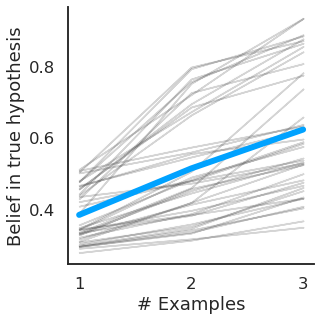

In [11]:
problem_pal = ['#333']*student_df.problem.nunique()
g = sns.relplot(data=student_df, x='num_hint', y='belief_in_true', hue='problem', kind='line', height=4.5, aspect=1,legend=False, palette=problem_pal, alpha=.01, ci=False)
g.set(xlabel='# Examples', ylabel='Belief in true hypothesis')
sns.lineplot(data=student_df, x='num_hint', y='belief_in_true', ax=g.axes[0,0], ci=False, linewidth=6, color='#00A2FF')

plt.savefig('plots/student_performance_over_time.pdf', bbox_inches='tight')

Plot model comparison:

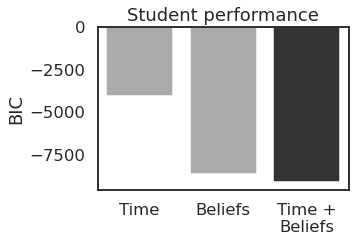

In [12]:
fig,ax = plt.subplots(figsize=(4.5,3))
sns.barplot(data=student_vs_time, x='term', y='BIC', palette=pal)
ax.set(xlabel='', title='Student performance')

plt.savefig('plots/student_performance_model_comparison.pdf', bbox_inches='tight')